In [1]:
from image_gen_aux import UpscaleWithModel
from image_gen_aux.utils import load_image

In [12]:
original = load_image("/home/thiendc/projects/icpr/dataset/train/Scenario-B/Brazilian/track_12599/lr-001-downsample.png")

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "5"
MODELS = {
    "4xNomos8kHAT-L_otf": "Phips/4xNomos8kHAT-L_otf",
    "4xHFA2kLUDVAESRFormer_light": "Phips/4xHFA2kLUDVAESRFormer_light"
}
LOADED_MODELS_CACHE = {}
def get_upscaler(model_name: str):
    if model_name not in LOADED_MODELS_CACHE:
        print(f"Loading model: {model_name}")
        LOADED_MODELS_CACHE[model_name] = UpscaleWithModel.from_pretrained(
            MODELS[model_name]
        ).to("cuda")
    return LOADED_MODELS_CACHE[model_name]


In [4]:
uscaler = get_upscaler("4xNomos8kHAT-L_otf")

Loading model: 4xNomos8kHAT-L_otf


4xNomos8kHAT-L_otf.safetensors:   0%|          | 0.00/165M [00:00<?, ?B/s]

/home/thiendc/projects/.conda/lib/python3.11/site-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4322.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


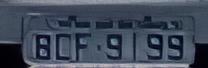

In [13]:
uscaler(original, tiling=True, tile_width=256, tile_height=256)